# 샤프지수(sharpe ratio)
* 샤프 비율은 투자 자산 또는 매매 전략에서, 일반적으로 위험이라 불리는 편차 한 단위당 초과수익(또는 위험 프리미엄)을 측정한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FinanceDataReader as fdr
kodex_df = fdr.DataReader('069500', '2019-06-24','2020-12-29')
kodex_df

Open   High    Low  Close    Volume    Change
Date                                                      
2019-06-24  26287  26417  26273  26312   4410930  0.001599
2019-06-25  26282  26441  26164  26275   6926681 -0.001406
2019-06-26  26237  26364  26217  26303   9823888  0.001066
2019-06-27  26374  26664  26320  26622   8525566  0.012128
2019-06-28  26617  26659  26489  26555   5808320 -0.002517
...           ...    ...    ...    ...       ...       ...
2020-12-22  36313  36402  35857  35860  13366082 -0.016295
2020-12-23  36044  36417  35736  36370  16133400  0.014222
2020-12-24  36436  37226  36436  37094  10251866  0.019907
2020-12-28  37328  37603  37132  37281  10044744  0.005041
2020-12-29  37628  37946  37182  37914  16762721  0.016979

[377 rows x 6 columns]

In [3]:
log_rtn_df = np.log(kodex_df.pct_change() + 1).fillna(0)
log_rtn_df.head()

Open      High       Low     Close    Volume    Change
Date                                                                  
2019-06-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2019-06-25 -0.000190  0.000908 -0.004157 -0.001407  0.451295  0.000000
2019-06-26 -0.001714 -0.002916  0.002024  0.001065  0.349436  0.000000
2019-06-27  0.005208  0.011315  0.003921  0.012055 -0.141748  2.431922
2019-06-28  0.009171 -0.000188  0.006400 -0.002520 -0.383778  0.000000

In [4]:
log_rtn_df = log_rtn_df[['Close']]
log_rtn_df.head()

Close
Date                
2019-06-24  0.000000
2019-06-25 -0.001407
2019-06-26  0.001065
2019-06-27  0.012055
2019-06-28 -0.002520

In [5]:
log_rtn_df.columns = ["KODEX200"]
log_rtn_df.head()

KODEX200
Date                
2019-06-24  0.000000
2019-06-25 -0.001407
2019-06-26  0.001065
2019-06-27  0.012055
2019-06-28 -0.002520

In [6]:
# log 연간 변동성

log_rtn_df.std() * np.sqrt(252)   

KODEX200    0.249952
dtype: float64

In [7]:
def get_annualized_returns_series(log_returns_df, num_day_in_year=250):  # 연log기대수익률
    return (log_returns_df.mean() * num_day_in_year).round(2)

def get_annualized_std_series(log_returns_df, num_day_in_year=250):   # 연log기대변동성
    return (log_returns_df.std() * (num_day_in_year ** 0.5)).round(2)

In [8]:
# 연간 복리수익률

cum_rtn_df = np.exp(log_rtn_df.cumsum())    # cumsum() : cumulative sum
cum_rtn_df.head()

KODEX200
Date                
2019-06-24  1.000000
2019-06-25  0.998594
2019-06-26  0.999658
2019-06-27  1.011782
2019-06-28  1.009235

In [9]:
cum_rtn_df.iloc[0]
cum_rtn_df.iloc[-1]

KODEX200    1.440939
Name: 2020-12-29 00:00:00, dtype: float64

In [10]:
num_day_in_year = 252
 
cagr = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1

## 연간 누적 수익률 : 27%

In [11]:
# n days 누적수익률을 연간 수익률로 환산

def get_CAGR_series(cum_rtn_df, num_day_in_year=250):  
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

In [12]:
get_CAGR_series(cum_rtn_df)

KODEX200    0.274098
Name: 2020-12-29 00:00:00, dtype: float64

In [13]:
yearly_rfr = 0.025
excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
excess_rtns / (log_rtn_df.std() * np.sqrt(252)) 

KODEX200    0.876872
dtype: float64

## 샤프지수 : 0.87

In [14]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
    return excess_rtns / ((log_rtn_df.std() * np.sqrt(252)))

In [15]:
get_sharpe_ratio(log_rtn_df)

KODEX200    0.876872
dtype: float64

# mdd(Maximum Drawdown)
* 특정 기간동안 발생한 최대 낙폭을 의미하는 하방 리스크 지표 입니다. MDD가 클수록 투자 리스크가 크기 때문에 유의해야 합니다.
* MDD = (기간 동안의 최저점 - 기간 동안의 최고점) / 기간 동안의 최고점

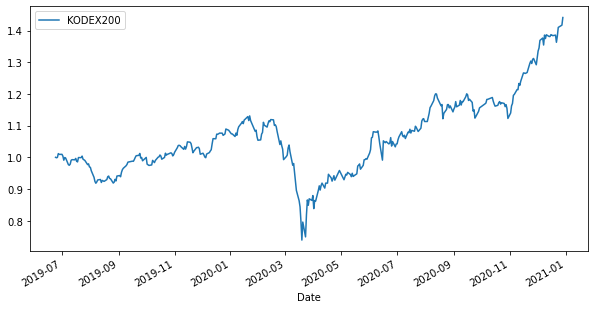

In [16]:
cum_rtn_df.plot(figsize=(10, 5));

<AxesSubplot:xlabel='Date'>

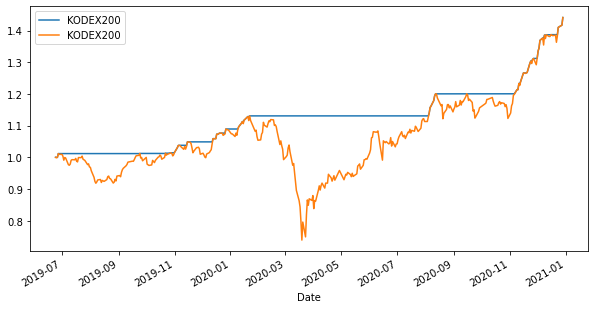

In [17]:
cummax_df = cum_rtn_df.cummax();  # 누적 고점

ax = cummax_df.plot(figsize=(10, 5))
cum_rtn_df.plot(ax=ax)

In [18]:
((cum_rtn_df - cummax_df)/cummax_df)[:10]

KODEX200
Date                
2019-06-24  0.000000
2019-06-25 -0.001406
2019-06-26 -0.000342
2019-06-27  0.000000
2019-06-28 -0.002517
2019-07-01 -0.002329
2019-07-02 -0.007888
2019-07-03 -0.020622
2019-07-04 -0.012358
2019-07-05 -0.013786

In [19]:
drawdown_df = cum_rtn_df / cummax_df - 1
drawdown_df[:10]

KODEX200
Date                
2019-06-24  0.000000
2019-06-25 -0.001406
2019-06-26 -0.000342
2019-06-27  0.000000
2019-06-28 -0.002517
2019-07-01 -0.002329
2019-07-02 -0.007888
2019-07-03 -0.020622
2019-07-04 -0.012358
2019-07-05 -0.013786

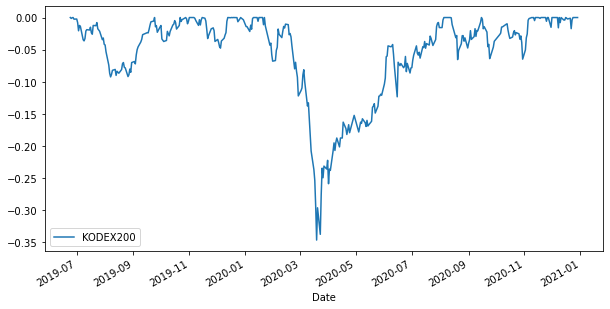

In [20]:
drawdown_df.plot(figsize=(10, 5));

In [21]:
# 최대 손실비율 

mdd_series = drawdown_df.min()
mdd_series

KODEX200   -0.346442
dtype: float64

In [22]:
# 최대 손실기간
drawdown_df

KODEX200
Date                
2019-06-24  0.000000
2019-06-25 -0.001406
2019-06-26 -0.000342
2019-06-27  0.000000
2019-06-28 -0.002517
...              ...
2020-12-22 -0.017346
2020-12-23 -0.003371
2020-12-24  0.000000
2020-12-28  0.000000
2020-12-29  0.000000

[377 rows x 1 columns]

In [23]:
# boolean indexing 인데, 데이터 구조가 series가 아닌, dataframe

drawdown_df == 0

KODEX200
Date                
2019-06-24      True
2019-06-25     False
2019-06-26     False
2019-06-27      True
2019-06-28     False
...              ...
2020-12-22     False
2020-12-23     False
2020-12-24      True
2020-12-28      True
2020-12-29      True

[377 rows x 1 columns]

In [24]:
# dataframe형식으로 boolean index를 넣으면 True 해당 데이터 => 0, False 해당 데이터=> nan
# draw down이 0이면 0, draw down이 0이 아니면 nan

max_point_df = drawdown_df[drawdown_df == 0]
max_point_df.head()

KODEX200
Date                
2019-06-24       0.0
2019-06-25       NaN
2019-06-26       NaN
2019-06-27       0.0
2019-06-28       NaN

In [25]:
_df = max_point_df["KODEX200"]
_df.tail()

Date
2020-12-22    NaN
2020-12-23    NaN
2020-12-24    0.0
2020-12-28    0.0
2020-12-29    0.0
Name: KODEX200, dtype: float64

In [26]:
_df.last_valid_index()  # last_valid_index() : nan이 아닌 마지막 데이터의 인덱스

Timestamp('2020-12-29 00:00:00')

In [27]:
drawdown_df["KODEX200"].last_valid_index()

Timestamp('2020-12-29 00:00:00')

In [28]:
_df.loc[drawdown_df["KODEX200"].last_valid_index()] = 0   # 마지막 데이터 (가장 최근데이)의 값을 0으로

In [29]:
_df.tail()

Date
2020-12-22    NaN
2020-12-23    NaN
2020-12-24    0.0
2020-12-28    0.0
2020-12-29    0.0
Name: KODEX200, dtype: float64

In [30]:
# draw down이 0아닌 데이터를 삭제.. draw down == 0 : 전고점 대비 하락하지 않은 날짜
# draw down이 0보다 작은 데이터를 모두 삭제하고 draw down이 0인 데이터만 남긴다..

_df = _df.dropna()  
_df.tail()

Date
2020-12-11    0.0
2020-12-16    0.0
2020-12-24    0.0
2020-12-28    0.0
2020-12-29    0.0
Name: KODEX200, dtype: float64

In [31]:
# draw down의 기간 길이를 계산
# 얼마 동안 하락하다가 다시 전고점 대비 상승전환하였는지..
# _df.index[1:] : 다음날의 날짜 인덱스
# _df.index[:-1] : 당일의 날짜 인덱스, 길이를 맞추기 위해서 마지막 데이터를 버림

periods = _df.index[1:] - _df.index[:-1]
periods

TimedeltaIndex([  '3 days',  '89 days',  '28 days',   '6 days',   '4 days',
                  '3 days',   '1 days',   '1 days',   '9 days',  '28 days',
                  '4 days',   '2 days',   '1 days',   '7 days',  '14 days',
                  '3 days',   '1 days',   '2 days',   '1 days',   '3 days',
                  '2 days', '196 days',   '1 days',   '1 days',   '3 days',
                  '1 days',   '1 days',  '34 days',  '55 days',   '2 days',
                  '2 days',   '3 days',   '3 days',   '1 days',   '3 days',
                  '1 days',   '2 days',   '1 days',   '4 days',   '1 days',
                  '1 days',   '1 days',   '3 days',   '2 days',   '2 days',
                  '5 days',   '8 days',   '4 days',   '1 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)

In [32]:
_df.index[1:]

DatetimeIndex(['2019-06-27', '2019-09-24', '2019-10-22', '2019-10-28',
               '2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-15', '2019-12-13', '2019-12-17', '2019-12-19',
               '2019-12-20', '2019-12-27', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-16', '2020-01-17', '2020-01-20',
               '2020-01-22', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-09-15',
               '2020-11-09', '2020-11-11', '2020-11-13', '2020-11-16',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-26', '2020-11-27', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-09',
               '2020-12-11', '2020-12-16', '2020-12-24', '2020-12-28',
               '2020-12-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [33]:
_df.index[:-1]

DatetimeIndex(['2019-06-24', '2019-06-27', '2019-09-24', '2019-10-22',
               '2019-10-28', '2019-11-01', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-15', '2019-12-13', '2019-12-17',
               '2019-12-19', '2019-12-20', '2019-12-27', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-16', '2020-01-17',
               '2020-01-20', '2020-01-22', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-09-15', '2020-11-09', '2020-11-11', '2020-11-13',
               '2020-11-16', '2020-11-19', '2020-11-20', '2020-11-23',
               '2020-11-24', '2020-11-26', '2020-11-27', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-07',
               '2020-12-09', '2020-12-11', '2020-12-16', '2020-12-24',
               '2020-12-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [34]:
# # draw down이 가장 긴 기간의 순서 인덱스

max_idx = periods.argmax()
max_idx

21

In [35]:
# draw down이 가장 긴 기간

longest_days = periods.max().days
longest_days

196

In [36]:
longest_start_date = _df.index[:-1][max_idx].date()
longest_end_date = _df.index[1:][max_idx].date()

print(longest_start_date, longest_end_date)

2020-01-22 2020-08-05


In [37]:
print(longest_days)
print("{} ~ {}".format(longest_start_date, longest_end_date))

196
2020-01-22 ~ 2020-08-05


In [38]:
print(periods.mean().days)
print(periods.std().days)

11
31


In [39]:
def get_drawdown_infos(cum_returns_df): 

    cummax_df = cum_returns_df.cummax()   # 누적 전고점
    dd_df = cum_returns_df / cummax_df - 1    # 전고점 대비 하락률 - draw down
 

    mdd_series = dd_df.min()  # max draw down - 전고점 대비 가장 큰 낙폭비율


    dd_duration_info_list = list()
    max_point_df = dd_df[dd_df == 0]  # draw down이 0인 데이터만 0, 나머지는 nan값
    for col in max_point_df:
        _df = max_point_df[col]
        _df.loc[dd_df[col].last_valid_index()] = 0   # 마지막 인덱스 데이터값은 0
        
        #  draw down이 0이 아닌 데이터는 모두 삭제, draw down이 0인 데이터만 남김
        # 전고점보다 가격이 상승하는 데이터만 남김..
        _df = _df.dropna()   
        
        periods = _df.index[1:] - _df.index[:-1]  # 구간별 하락 기간의 날짜수를 계산

        days = periods.days
        max_idx = days.argmax()  # 하락이 가장 긴 기간 데이터의 인덱스

        longest_dd_period = days.max()  # 하락이 가장 긴 기간
        dd_mean = int(np.mean(days))  # 평균 하락 기간
        dd_std = int(np.std(days))    # 하락 기간의 변동성(표준편차)
        

        dd_duration_info_list.append(  # 칼럼별(종목별)로 값을 계산해서 리스트에 담는다
            [
                dd_mean,  # 평균 하락기간
                dd_std,   # 하락기간 표준편차
                longest_dd_period,  # 가장 긴 하락 기간
                
                # 가장 긴 하락기간의 시작일과 종료일
                "{} ~ {}".format(_df.index[:-1][max_idx].date(), _df.index[1:][max_idx].date())
            ]
        )

    dd_duration_info_df = pd.DataFrame(
        dd_duration_info_list,
        index=dd_df.columns,
        columns=['drawdown mean', 'drawdown std', 'longest days', 'longest period']
    )
    return dd_df, mdd_series, dd_duration_info_df

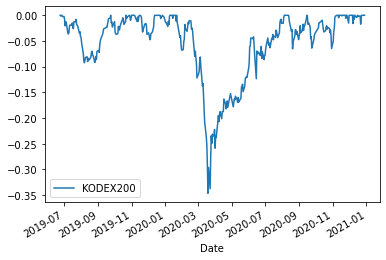

In [40]:
result = get_drawdown_infos(cum_rtn_df)
result[0].plot();

## MDD값 : -0.34

In [41]:
result[1]

KODEX200   -0.346442
dtype: float64

In [42]:
result[2]

drawdown mean  drawdown std  longest days           longest period
KODEX200             11            30           196  2020-01-22 ~ 2020-08-05